The notebook performs exploratory data analysis (EDA) on the SGIJ dataset

In [279]:
import math
from datetime import date
from datetime import datetime
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib
import matplotlib.pyplot as plt
import mysql.connector
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

Connect to MySQL databasef from credentials

In [280]:
config = {
  'user': 'root',
  'password': 'thingtrack',
  'host': '127.0.0.1',
  'database': 'gaming',
  'raise_on_warnings': True
}

try:
  cnx = mysql.connector.connect(**config)
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)

Execute query and obtain dataset from database

In [281]:
# create dataset from database
cursor = cnx.cursor()

query = ("SELECT pl.birthdate, SUM(ac.profit) AS profit"
         " FROM player pl, account ac"
         " WHERE pl.operator_id = ac.operator_id"
         " AND pl.player_id = ac.player_id"
         " GROUP BY ac.operator_id, ac. player_id")

cursor.execute(query)

# return a list of tuples
result = list(cursor.fetchall())

Transform date attribute and create tuples

In [282]:
# separate tuples
dates, profits = zip(*result)

# convert string to date
# dates = [pd.to_datetime(d) for d in dates]

Show Age vs Profit Scatter Plot

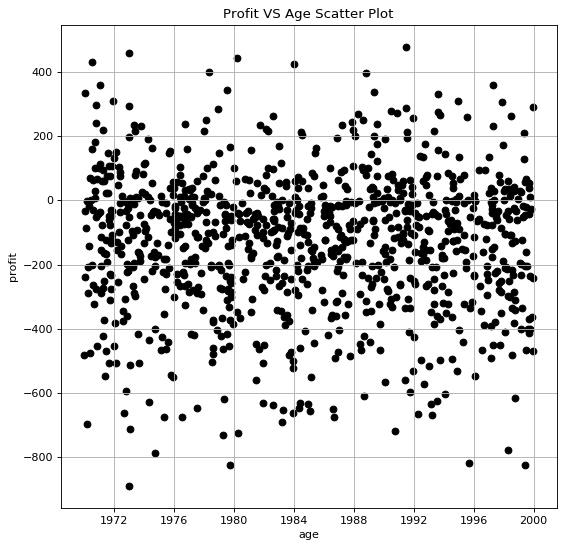

In [283]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(dates, profits, color='k')
plt.title("Profit VS Age Scatter Plot")
plt.xlabel("age")
plt.ylabel("profit")
plt.grid()
plt.show()

Design de k-means model for dataset

In [284]:
model = KMeans(n_clusters=2).fit(X)

Print k-means centroides for 2 clusters in the dataset

In [286]:
print(model.cluster_centers_)


[[ 7.08544461e+08 -1.28541082e+02]
 [ 2.28696575e+08 -1.31379242e+02]]


Plot the scatter plot and the centroides for tha dataset

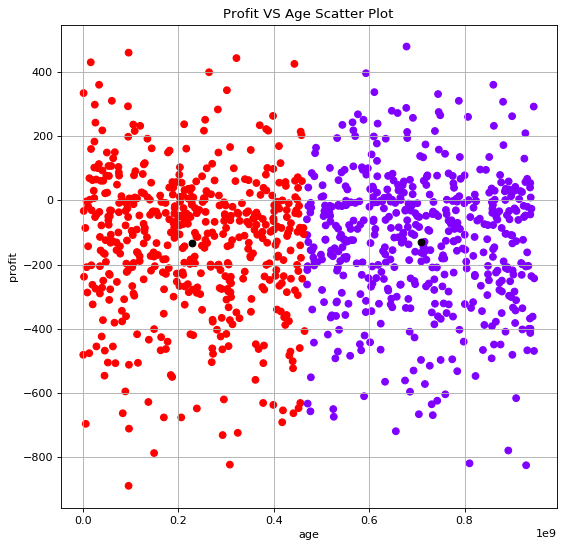

In [287]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y, c=model.labels_, cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], color='black')
plt.title("Profit VS Age Scatter Plot")
plt.xlabel("age")
plt.ylabel("profit")
plt.grid()
plt.show()